# Delhivery - Feature Engineering

## About Delhivery

Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

## Business Problem

Delhivery aims to establish itself as the premier player in the logistics industry. This
case study is of paramount importance as it aligns with the company's core objectives and operational excellence. It provides a practical framework for understanding and processing data, which is integral to their operations. By leveraging data engineering pipelines and data analysis techniques, Delhivery can achieve several critical goals.

First, it allows them to ensure data integrity and quality by addressing missing values and structuring the dataset appropriately. Second, it enables the extraction of valuable features from raw data, which can be utilized for building accurate forecasting models. Moreover, it facilitates the identification of patterns, insights, and actionable recommendations crucial for optimizing their logistics operations.

By conducting hypothesis testing and outlier detection, Delhivery can refine their processes and further enhance the quality of service they provide.

In [81]:
# Lets import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm


# Use this code to style the plots - globally
plt.style.use('ggplot')
# If you want to know what other styles are available, use plt.style.available


# Use this code to ignore any unnecessary filter warnings
import warnings
warnings.filterwarnings('ignore')

In [82]:
# Lets import the dataset

df = pd.read_csv('delhivery_data.csv')

## 1. Basic data cleaning and exploration

### Problem Statement

Delhivery, India's largest and fastest-growing logistics company, seeks to leverage its extensive data resources to optimize its operations, increase efficiency, and maintain a competitive edge in the market. As the company processes vast amounts of raw data generated from various data engineering pipelines, there is a pressing need to transform this data into meaningful, actionable insights. The primary objective is to clean, sanitize, and engineer features from the raw data, enabling the data science team to develop accurate forecasting models that can support decision-making, enhance operational efficiency, and drive profitability.

The challenge lies in identifying and extracting the most impactful features from the raw data, ensuring the data's quality and relevance, and aligning the feature engineering process with the business goals of forecasting and predictive analytics.

In [83]:
# Lets look at the head of the data

df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [84]:
# Lets look at the shape of the data

df.shape

(144867, 24)

In [85]:
# What are the columns available in this dataset

df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

### Column Profiling

- __data__ - tells whether the data is testing or training data
- __trip_creation_time__ - Timestamp of trip creation
- __route_schedule_uuid__ - Unique Id for a particular route schedule
- __route_type__ - Transportation type
- __FTL__ - Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way
- __trip_uuid__ - Unique ID given to a particular trip (A trip may include different source and destination centers)
- __source_center__ - Source ID of trip origin
- __source_name__ - Source Name of trip origin
- __destination_cente__ - Destination ID
- __destination_name__ - Destination Name
- __od_start_time__ - Trip start time
- __od_end_time__ - Trip end time
- __start_scan_to_end_scan__ - Time taken to deliver from source to destination
- __is_cutoff__ - Unknown field
- __cutoff_factor__ - Unknown field
- __cutoff_timestamp__ - Unknown field
- __actual_distance_to_destination__ - Distance in Kms between source and destination warehouse
- __actual_time__ - Actual time taken to complete the delivery (Cumulative)
- __osrm_time__ - An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)
- __osrm_distance__ - An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)
- __factor__ - Unknown field
- __segment_actual_time__ - This is a segment time. Time taken by the subset of the package delivery
- __segment_osrm_time__ - This is the OSRM segment time. Time taken by the subset of the package delivery
- __segment_osrm_distance__ - This is the OSRM distance. Distance covered by subset of the package delivery
- __segment_factor__ - Unknown field

### Info of the dataframe

In [86]:
# Lets look into each column to get a better understanding of how the data looks like

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

### Datatypes

In [87]:
# Lets check if the datatypes are correctly assigned or not

# From the info above we can see that trip_creation_time, od_start_time, od_end_time and cutoff_timestamp
# Convert those to datetime format

df['trip_creation_time'] = pd.to_datetime(df['trip_creation_time'])
df['od_start_time'] = pd.to_datetime(df['od_start_time'])
df['od_end_time'] = pd.to_datetime(df['od_end_time'])
df['cutoff_timestamp'] = pd.to_datetime(df['cutoff_timestamp'])

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  object        
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  object        
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

### Null values

In [89]:
# Lets see if there are any null values

df.isnull().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

> We can see some null values in source_name and destination_center

In [90]:
# Lets see the % of null values

df.isna().sum()/len(df) * 100

data                              0.000000
trip_creation_time                0.000000
route_schedule_uuid               0.000000
route_type                        0.000000
trip_uuid                         0.000000
source_center                     0.000000
source_name                       0.202254
destination_center                0.000000
destination_name                  0.180165
od_start_time                     0.000000
od_end_time                       0.000000
start_scan_to_end_scan            0.000000
is_cutoff                         0.000000
cutoff_factor                     0.000000
cutoff_timestamp                  0.000000
actual_distance_to_destination    0.000000
actual_time                       0.000000
osrm_time                         0.000000
osrm_distance                     0.000000
factor                            0.000000
segment_actual_time               0.000000
segment_osrm_time                 0.000000
segment_osrm_distance             0.000000
segment_fac

> There are only .2% and .1% null values for source_name and destination_name respectively

In [91]:
# Lets remove the null values

df.dropna(inplace=True)

### Merging Rows

In [92]:
# Lets create a unique identifier - segment_key

df['segment_key'] = df['trip_uuid'] + '_' + df['source_center'] + '_' + df['destination_center']

In [93]:
df['segment_key'].head()

0    trip-153741093647649320_IND388121AAA_IND388620AAB
1    trip-153741093647649320_IND388121AAA_IND388620AAB
2    trip-153741093647649320_IND388121AAA_IND388620AAB
3    trip-153741093647649320_IND388121AAA_IND388620AAB
4    trip-153741093647649320_IND388121AAA_IND388620AAB
Name: segment_key, dtype: object

In [94]:
# Now merge the rows in columns segment_actual_time, segment_osrm_distance, segment_osrm_time based on the segment_key

df['segment_actual_time_sum'] = df.groupby('segment_key')['segment_actual_time'].cumsum()
df['segment_osrm_distance_sum'] = df.groupby('segment_key')['segment_osrm_distance'].cumsum()
df['segment_osrm_time_sum'] = df.groupby('segment_key')['segment_osrm_time'].cumsum()

In [95]:
# Define aggregation rules for segment-level aggregation

create_segment_dict = {
    'trip_creation_time': 'first',            # Keep the first creation time
    'route_schedule_uuid': 'first',           # Keep the first schedule
    'route_type': 'first',                    # Keep the first route type
    'od_start_time': 'first',                 # Keep the start time of the segment
    'od_end_time': 'last',                    # Keep the end time of the segment
    'start_scan_to_end_scan': 'sum',          # Sum the values across rows for total duration
    'actual_distance_to_destination': 'sum',  # Sum distances
    'actual_time': 'sum',                     # Sum actual times
    'osrm_time': 'sum',                       # Sum OSRM times
    'osrm_distance': 'sum',                   # Sum OSRM distances
    'factor': 'mean',                         # Take mean of factors
    'segment_actual_time_sum': 'last',        # Get the last cumulative value
    'segment_osrm_distance_sum': 'last',      # Get the last cumulative value
    'segment_osrm_time_sum': 'last'           # Get the last cumulative value
}

In [96]:
# Aggregating at the segment level using segment_key

df_segment = df.groupby('segment_key').agg(create_segment_dict).reset_index()

In [97]:
# Sorting by segment_key and then by od_end_time to maintain order within segments

df_segment = df_segment.sort_values(by=['segment_key', 'od_end_time']).reset_index(drop=True)

In [98]:
# Display the resulting DataFrame
df_segment.head()

,segment_key,trip_creation_time,route_schedule_uuid,route_type,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,trip-153671041653548748_IND209304AAA_IND000000ACB,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,22680.0,3778.765471,6484.0,3464.0,4540.1261,1.741964,728.0,670.6205,534.0
1,trip-153671041653548748_IND462022AAA_IND209304AAA,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,20979.0,5082.046634,9198.0,4323.0,6037.6386,2.150702,820.0,649.8528,474.0
2,trip-153671042288605164_IND561203AAB_IND562101AAA,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,174.0,53.310332,96.0,55.0,60.3157,1.746424,46.0,28.1995,26.0
3,trip-153671042288605164_IND572101AAA_IND561203AAB,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,732.0,186.897974,303.0,155.0,209.1151,1.875977,95.0,55.9899,39.0
4,trip-153671043369099517_IND000000ACB_IND160002AAC,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,10008.0,1725.590250,2601.0,1427.0,1975.7409,1.737898,608.0,317.7408,231.0


In [99]:
df_segment.shape

(26222, 15)

## Build some features to prepare the data for actual analysis

In [100]:
# Lets calculate `od_time_diff_hour` by finding the time difference between `od_start_time` and `od_end_time`

# Calculate the time difference in hours
df['od_time_diff_hour'] = (df['od_end_time'] - df['od_start_time']).dt.total_seconds() / 3600

In [101]:
# Drop `od_start_time` and `od_end_time`

df = df.drop(columns=['od_start_time', 'od_end_time'])

In [102]:
# Split and extract features from `destination_name` - City, Place, Code and State

df[['dest_city', 'dest_place', 'dest_code', 'dest_state']] = df['destination_name'].str.extract(r'([^_]+)_([^_]+)_([^ ]+) \(([^)]+)\)')

In [103]:
# Split and extract features from `source_name` - City, Place, Code and State

df[['source_city', 'source_place', 'source_code', 'source_state']] = df['source_name'].str.extract(r'([^_]+)_([^_]+)_([^ ]+) \(([^)]+)\)')

In [104]:
# Extract datetime features from `trip_creation_time`

df['trip_creation_year'] = df['trip_creation_time'].dt.year
df['trip_creation_month'] = df['trip_creation_time'].dt.month
df['trip_creation_day'] = df['trip_creation_time'].dt.day
df['trip_creation_hour'] = df['trip_creation_time'].dt.hour
df['trip_creation_minute'] = df['trip_creation_time'].dt.minute
df['trip_creation_weekday'] = df['trip_creation_time'].dt.weekday  # Monday=0, Sunday=6

In [105]:
# Drop `trip_creation_time` feature extraction

# df = df.drop(columns=['trip_creation_time'])

In [106]:
# Display the resulting DataFrame
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,...,source_city,source_place,source_code,source_state,trip_creation_year,trip_creation_month,trip_creation_day,trip_creation_hour,trip_creation_minute,trip_creation_weekday
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,...,Anand,VUNagar,DC,Gujarat,2018,9,20,2,35,3
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,...,Anand,VUNagar,DC,Gujarat,2018,9,20,2,35,3
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,...,Anand,VUNagar,DC,Gujarat,2018,9,20,2,35,3
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,...,Anand,VUNagar,DC,Gujarat,2018,9,20,2,35,3
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,...,Anand,VUNagar,DC,Gujarat,2018,9,20,2,35,3


## In-depth analysis

### Grouping and Aggregating at Trip-level

In [107]:
# Define aggregation rules for trip-level summary

create_trip_dict = {
    'trip_creation_time': 'first',            # Keep first creation time
    'route_schedule_uuid': 'first',           # Keep first schedule
    'route_type': 'first',                    # Keep first route type
    'od_time_diff_hour': 'sum',               # Sum up total od_time_diff
    'actual_distance_to_destination': 'sum',  # Total distance to destination
    'actual_time': 'sum',                     # Total actual time
    'osrm_time': 'sum',                       # Total OSRM time
    'osrm_distance': 'sum',                   # Total OSRM distance
    'factor': 'mean'                          # Mean of factor across segments
}

In [108]:
# Group by trip_uuid and apply aggregation

df_trip = df.groupby('trip_uuid').agg(create_trip_dict).reset_index()

In [109]:
df_trip

,trip_uuid,trip_creation_time,route_schedule_uuid,route_type,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor
0,trip-153671041653548748,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,728.008209,8860.812105,15682.0,7787.0,10577.7647,1.962054
1,trip-153671042288605164,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,15.219568,240.208306,399.0,210.0,269.4308,1.832792
2,trip-153671043369099517,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,4144.906395,68163.502238,112225.0,65768.0,89447.2488,1.703628
3,trip-153671046011330457,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,3.349831,28.529648,82.0,24.0,31.6475,3.244444
4,trip-153671052974046625,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,26.478517,239.007304,556.0,207.0,266.2914,2.573923
...,...,...,...,...,...,...,...,...,...,...
14782,trip-153861095625827784,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,14.655464,141.057373,186.0,148.0,162.9473,1.301065
14783,trip-153861104386292051,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,2.019684,25.130640,33.0,19.0,26.5333,1.732143
14784,trip-153861106442901555,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,21.105993,93.743842,549.0,134.0,162.8499,3.880469
14785,trip-153861115439069069,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,22.006709,355.281673,600.0,446.0,449.5383,1.388275


### Outlier Detection & Treatment

In [110]:
# We can detect outliers using IQR method

# Select numeric columns

numeric_cols = df_trip.select_dtypes(include=[np.number]).columns

In [111]:
# Calculate Q1 and Q3

Q1 = df_trip[numeric_cols].quantile(0.25)
Q3 = df_trip[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

In [112]:
# Detect outliers

outliers = ((df_trip[numeric_cols] < (Q1 - 1.5 * IQR)) | (df_trip[numeric_cols] > (Q3 + 1.5 * IQR)))

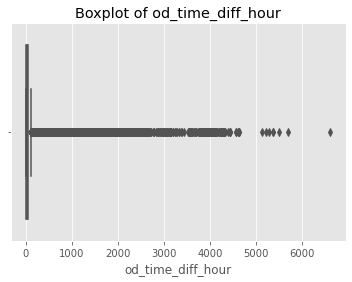

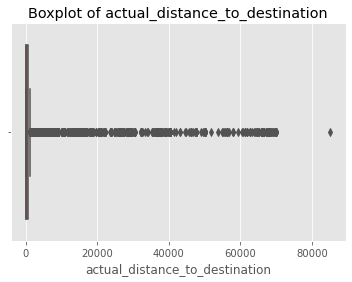

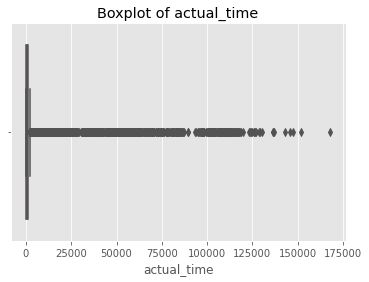

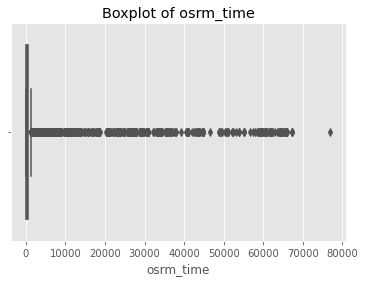

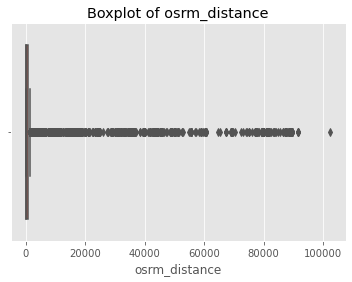

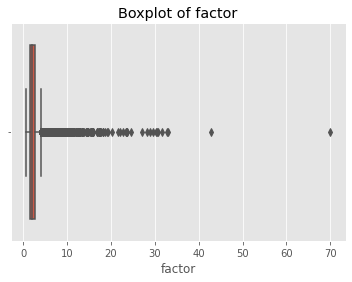

In [113]:
# Lets visualize the outliers using a Boxplot

# Plotting boxplots for each numeric column

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_trip[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [114]:
# We can see a lot of outliers, Lets handle them using IQR method

# Capping outliers to 1.5 * IQR limits
for col in numeric_cols:
    lower_bound = Q1[col] - 1.5 * IQR[col]
    upper_bound = Q3[col] + 1.5 * IQR[col]
    df_trip[col] = np.where(df_trip[col] < lower_bound, lower_bound, df_trip[col])
    df_trip[col] = np.where(df_trip[col] > upper_bound, upper_bound, df_trip[col])


### One-Hot Encoding of Categorical Features

In [115]:
# Identify categorical columns for encoding

categorical_cols = df_trip.select_dtypes(include=['object']).columns

In [116]:
# Apply one-hot encoding

df_trip = pd.get_dummies(df_trip, columns=categorical_cols, drop_first=True)

### Normalize/Standardize Numerical Features

In [118]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [119]:
# We have two methods for scaling - MinMaxScaler() and StandardScaler()

# Lets use MinMaxScaler

scaler = MinMaxScaler()        # Normalization
# scaler = StandardScaler()    # Standardization

In [120]:
# Apply scaling to numerical columns

df_trip[numeric_cols] = scaler.fit_transform(df_trip[numeric_cols])

## Hypothesis Testing

### Aggregating Values by trip_uuid

In [138]:
# Aggregating necessary columns at the trip level

df_trip_agg = df.groupby('trip_uuid').agg({
    'actual_time': 'sum',
    'osrm_time': 'sum',
    'segment_actual_time': 'sum',
    'segment_osrm_time': 'sum',
    'osrm_distance': 'sum',
    'segment_osrm_distance': 'sum'
}).reset_index()


In [139]:
# Lets handle the outliers
numeric_cols = df_trip_agg.select_dtypes(include=[np.number]).columns

Q1 = df_trip_agg[numeric_cols].quantile(0.25)
Q3 = df_trip_agg[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df_trip_agg[numeric_cols] < (Q1 - 1.5 * IQR)) | (df_trip_agg[numeric_cols] > (Q3 + 1.5 * IQR)))

for col in numeric_cols:
    lower_bound = Q1[col] - 1.5 * IQR[col]
    upper_bound = Q3[col] + 1.5 * IQR[col]
    df_trip_agg[col] = np.where(df_trip_agg[col] < lower_bound, lower_bound, df_trip_agg[col])
    df_trip_agg[col] = np.where(df_trip_agg[col] > upper_bound, upper_bound, df_trip_agg[col])


### Visual Analysis

In [140]:
# Define pairs to compare

comparison_pairs = [
    ('actual_time', 'osrm_time'),
    ('actual_time', 'segment_actual_time'),
    ('osrm_distance', 'segment_osrm_distance'),
    ('osrm_time', 'segment_osrm_time')
]

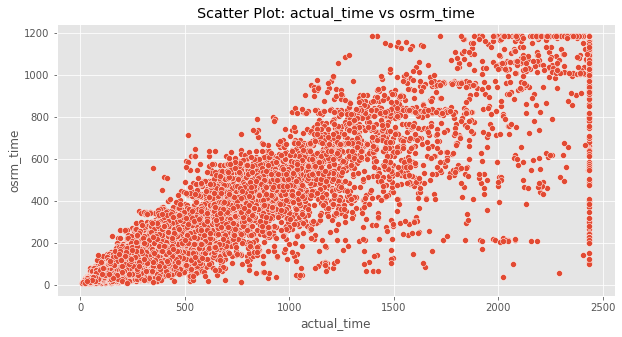

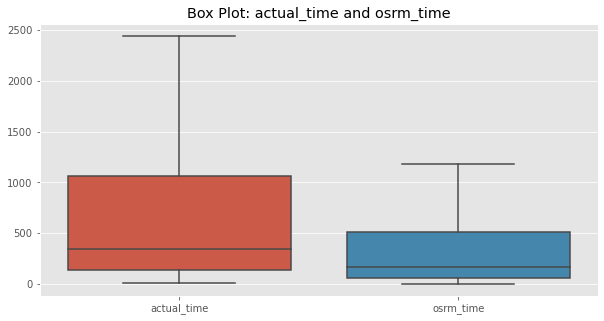

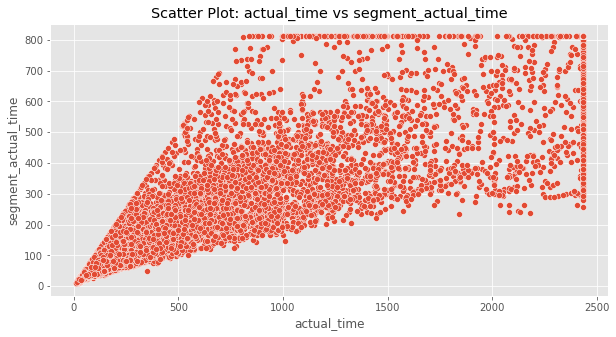

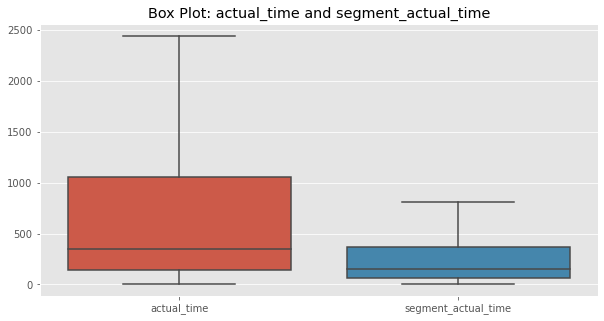

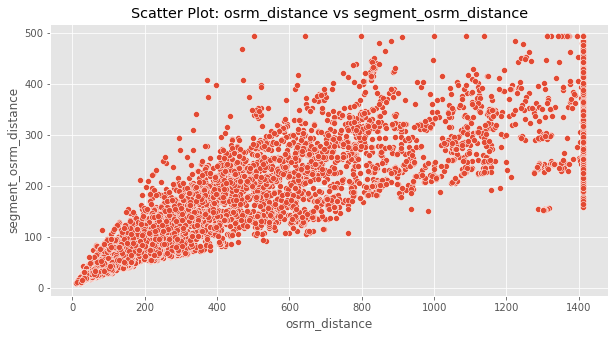

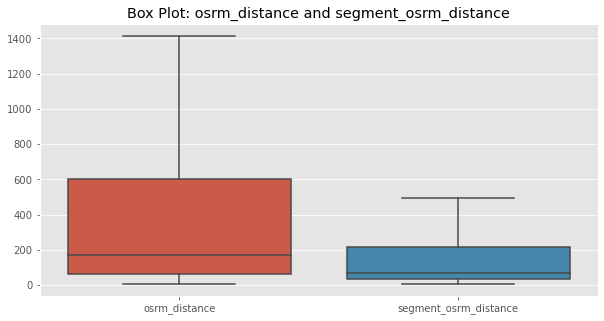

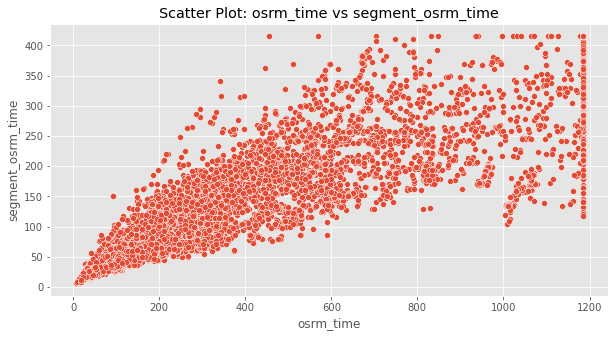

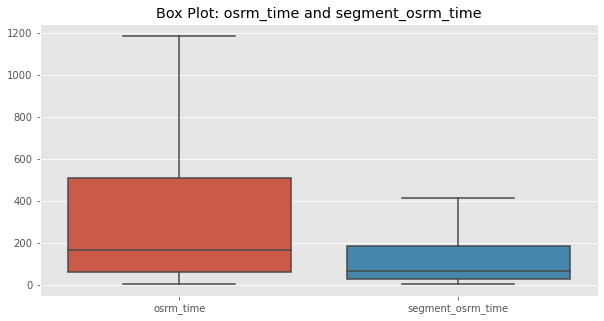

In [141]:
# Plotting scatter and box plots for each pair

for x, y in comparison_pairs:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=df_trip_agg[x], y=df_trip_agg[y])
    plt.title(f'Scatter Plot: {x} vs {y}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df_trip_agg[[x, y]])
    plt.title(f'Box Plot: {x} and {y}')
    plt.show()

### Hypothesis Testing

In [142]:
from scipy.stats import ttest_rel

In [143]:
# Perform paired t-tests for each comparison pair

for x, y in comparison_pairs:
    t_stat, p_value = ttest_rel(df_trip_agg[x], df_trip_agg[y])
    print(f'Hypothesis Test for {x} vs {y}:')
    print(f'T-statistic = {t_stat:.3f}, P-value = {p_value:.3f}\n')

Hypothesis Test for actual_time vs osrm_time:
T-statistic = 104.254, P-value = 0.000

Hypothesis Test for actual_time vs segment_actual_time:
T-statistic = 99.494, P-value = 0.000

Hypothesis Test for osrm_distance vs segment_osrm_distance:
T-statistic = 97.276, P-value = 0.000

Hypothesis Test for osrm_time vs segment_osrm_time:
T-statistic = 99.371, P-value = 0.000



## Business Insights & Recommendations

### Identify Sources of Most Orders

In [144]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,...,source_place,source_code,source_state,trip_creation_year,trip_creation_month,trip_creation_day,trip_creation_hour,trip_creation_minute,trip_creation_weekday,corridor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,...,VUNagar,DC,Gujarat,2018,9,20,2,35,3,Anand_VUNagar_DC (Gujarat) to Khambhat_MotvdDP...
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,...,VUNagar,DC,Gujarat,2018,9,20,2,35,3,Anand_VUNagar_DC (Gujarat) to Khambhat_MotvdDP...
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,...,VUNagar,DC,Gujarat,2018,9,20,2,35,3,Anand_VUNagar_DC (Gujarat) to Khambhat_MotvdDP...
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,...,VUNagar,DC,Gujarat,2018,9,20,2,35,3,Anand_VUNagar_DC (Gujarat) to Khambhat_MotvdDP...
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,...,VUNagar,DC,Gujarat,2018,9,20,2,35,3,Anand_VUNagar_DC (Gujarat) to Khambhat_MotvdDP...


In [145]:
# Most frequent source and destination states or centers

most_orders_source = df['source_name'].value_counts().head(10)
most_orders_destination = df['destination_name'].value_counts().head(10)

In [146]:
# Display results

print("Top 10 Source Centers:\n", most_orders_source)
print("\n")
print("Top 10 Destination Centers:\n", most_orders_destination)

Top 10 Source Centers:
 Gurgaon_Bilaspur_HB (Haryana)        23267
Bangalore_Nelmngla_H (Karnataka)      9975
Bhiwandi_Mankoli_HB (Maharashtra)     9088
Pune_Tathawde_H (Maharashtra)         4061
Hyderabad_Shamshbd_H (Telangana)      3340
Kolkata_Dankuni_HB (West Bengal)      2612
Chandigarh_Mehmdpur_H (Punjab)        2450
Surat_HUB (Gujarat)                   2189
Delhi_Airport_H (Delhi)               1997
Bengaluru_Bomsndra_HB (Karnataka)     1958
Name: source_name, dtype: int64


Top 10 Destination Centers:
 Gurgaon_Bilaspur_HB (Haryana)        15192
Bangalore_Nelmngla_H (Karnataka)     11019
Bhiwandi_Mankoli_HB (Maharashtra)     5492
Hyderabad_Shamshbd_H (Telangana)      5142
Kolkata_Dankuni_HB (West Bengal)      4892
Delhi_Airport_H (Delhi)               3761
Pune_Tathawde_H (Maharashtra)         3695
Chandigarh_Mehmdpur_H (Punjab)        2874
Sonipat_Kundli_H (Haryana)            2796
Bhubaneshwar_Hub (Orissa)             2524
Name: destination_name, dtype: int64


### Analyze Busiest Corridors, Average Distance, and Time Taken

In [147]:
# Create a corridor identifier

df['corridor'] = df['source_name'] + " to " + df['destination_name']

In [148]:
# Find the busiest corridors

busiest_corridors = df['corridor'].value_counts().head(10)
print("Top 10 Busiest Corridors:\n", busiest_corridors)

Top 10 Busiest Corridors:
 Gurgaon_Bilaspur_HB (Haryana) to Bangalore_Nelmngla_H (Karnataka)        4976
Bangalore_Nelmngla_H (Karnataka) to Gurgaon_Bilaspur_HB (Haryana)        3316
Gurgaon_Bilaspur_HB (Haryana) to Kolkata_Dankuni_HB (West Bengal)        2862
Gurgaon_Bilaspur_HB (Haryana) to Hyderabad_Shamshbd_H (Telangana)        1639
Gurgaon_Bilaspur_HB (Haryana) to Bhiwandi_Mankoli_HB (Maharashtra)       1617
Bhiwandi_Mankoli_HB (Maharashtra) to Gurgaon_Bilaspur_HB (Haryana)       1269
Guwahati_Hub (Assam) to Delhi_Airport_H (Delhi)                          1137
Bhiwandi_Mankoli_HB (Maharashtra) to Bangalore_Nelmngla_H (Karnataka)    1131
Gurgaon_Bilaspur_HB (Haryana) to Pune_Tathawde_H (Maharashtra)           1120
Gurgaon_Bilaspur_HB (Haryana) to MAA_Poonamallee_HB (Tamil Nadu)         1015
Name: corridor, dtype: int64


### Average Distance and Time Taken for Each Corridor

In [149]:
# Group by corridor to get average distance and time taken

corridor_stats = df.groupby('corridor').agg({
    'actual_distance_to_destination': 'mean',
    'actual_time': 'mean'
}).rename(columns={
    'actual_distance_to_destination': 'avg_distance',
    'actual_time': 'avg_time'
}).reset_index()

In [150]:
# Display corridor stats for busiest corridors

print("Average Distance and Time for Busiest Corridors:\n", corridor_stats.head(10))

Average Distance and Time for Busiest Corridors:
                                             corridor  avg_distance    avg_time
0  AMD_Memnagar (Gujarat) to Ahmedabad_East_H_1 (...     13.166738   30.437500
1  AMD_Rakhial (Gujarat) to Ahmedabad_East_H_1 (G...     11.704146   43.603175
2           Abohar_DC (Punjab) to Malout_DC (Punjab)     22.113336   19.000000
3         Abohar_DC (Punjab) to Muktsar_DPC (Punjab)     37.613637   76.000000
4  Achrol_BgwriDPP_D (Rajasthan) to Jaipur_Hub (R...     31.059072   61.000000
5  Addanki_Oilmilrd_D (Andhra Pradesh) to Ongole_...     29.661637  174.000000
6  Adoor_Town_D (Kerala) to Kollam_Central_H_1 (K...     22.179028   93.594595
7  Agra_Central_D_3 (Uttar Pradesh) to Kirauli_Ac...     17.253622   34.350000
8  Agra_Idgah_L (Uttar Pradesh) to Gurgaon_Bilasp...     97.921666  171.437500
9  Agra_Idgah_P (Uttar Pradesh) to Delhi_Airport_...     93.981262  220.512195


### Business Insights and Recommendations

From the above analyses, here are some patterns and actionable insights:

> __Source and Destination Patterns:__
> We have identified the top Source states as _Haryana, Karnataka, Maharashtra, Telangana, West Bengal, Punjab, Gujarat, Delhi_ and the top Destination states as _Haryana, Karnataka, Maharashtra, Telangana, West Bengal, Delhi, Punjab, Orissa_
> Recommendation: Scale infrastructure and improve resources (e.g., warehouses, staff) in these high-demand locations to meet growing order volumes and minimize delays
>
>
> __Busiest Corridors:__
> Some of the busiest corridors are Gurgaon to Bangalore, Bangalore to Gurgaon, Gurgaon to Kolkata etc
> Recommendation: Increase logistics resources on popular routes to handle high volumes efficiently. Additionally, for corridors with consistently high travel times, explore alternative routes or transit methods to reduce delivery times
>
>
> __Distance and Time Analysis:__
> Corridors with long average distances but high volume might require optimization or faster modes of transport
> Recommendation: Introduce express shipping options or partnerships on long corridors with high traffic, ensuring faster deliveries and increased customer satisfaction